# Data Visualization Notebook

This notebook demonstrates how to load and visualize data from the IKEA Manuals at Work dataset using the `KeyframeDataset` class.

## Setup

First, we import the necessary libraries and set the paths to the annotation file, video directory, object directory, manual image directory, and PDF directory.


In [3]:
import sys
sys.path.append("path/to/IKEA-Manuals-at-Work/src") # e.g. ./IKEA-Manuals-at-Work/src
from IKEAVideo.dataloader.dataset_keyframe import KeyframeDataset

annotation_file = "../data/data.json"
video_dir = "../data/videos/"
obj_dir = '../data/parts'
manual_img_dir = '../data/manual_img'
pdf_dir = '../data/pdfs'
num_of_data = 1 # Change this to load more data, we only load 1 data for visualization
debug = False 
verbose = False # Set to True to print out the data
load_into_mem=False
demo_print = True 
demo_viz = True # Set to True to visualize the data

dataset = KeyframeDataset(annotation_file, video_dir, transform=None, load_into_mem=load_into_mem, verbose=verbose, 
                          debug=debug, obj_dir=obj_dir, num_of_data=num_of_data,
                          manual_img_dir=manual_img_dir, pdf_dir=pdf_dir,
                            demo_print=demo_print, demo_viz=demo_viz)

Building frame data: 100%|██████████| 1/1 [00:00<00:00,  1.50it/s]


# Exploring a Sample
We can load a specific sample from the dataset by providing the video index and frame index. The `__getitem__` method returns a dictionary containing various information about the frame, such as the category, name, video URL, frame time, parts, manual step details, and more.

Category: Bench
Name: applaro
Video URL: https://www.youtube.com/watch?v=KPs0ik2FcsY
Other Video URLs for the Same Furniture: ['https://www.youtube.com/watch?v=KPs0ik2FcsY']
Frame Time: 52.82
Is Keyframe: False
Is Frame After Keyframe: False
Number of Camera Changes: 1
Frame Parts: ['0,2', '1', '3']
Furniture IDs: ['90205182']
Variants: []
Furniture URLs: ['https://www.ikea.com/au/en/p/aepplaroe-bench-outdoor-brown-stained-90205182/']
Furniture Main Image URLs: ['https://www.ikea.com/au/en/images/products/aepplaroe-bench-outdoor-brown-stained__0727613_pe735738_s5.jpg']
Video URLs: ['https://www.youtube.com/watch?v=KPs0ik2FcsY']
Manual Step ID: 1
Step ID: 1
Step Start: 47.0
Step End: 62.1
Step Duration: 15.1
Substep ID: 1
Substep Start: 50.82
Substep End: 57.02
Frame ID: 1584
Other Video URLs: ['https://www.youtube.com/watch?v=KPs0ik2FcsY']
Frame Image: 


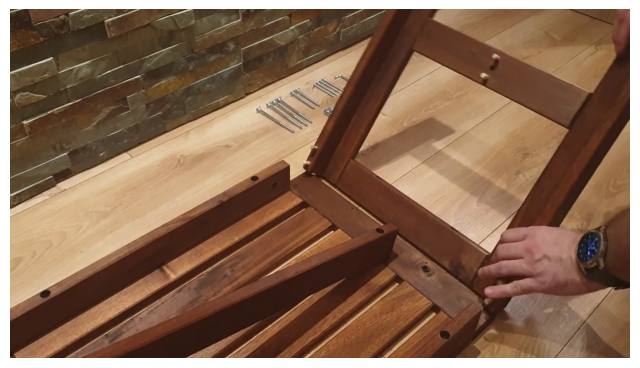

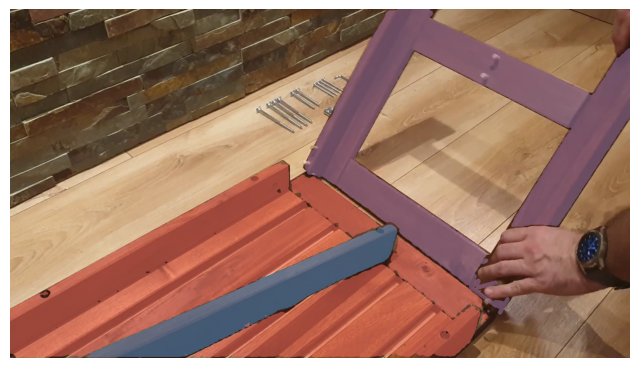

Croped Manual Image: 


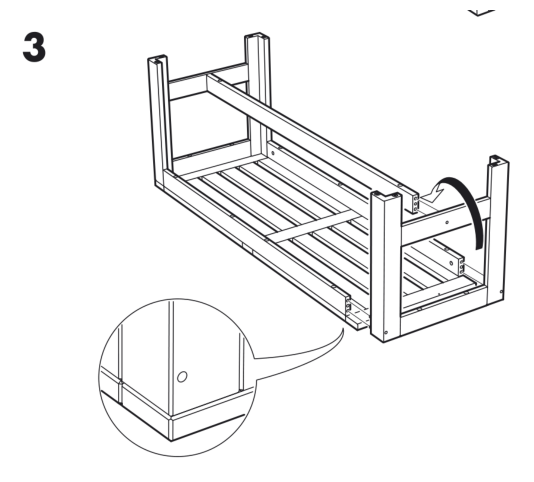

Manual URLs: ['https://www.ikea.com/au/en/assembly_instructions/aepplaroe-bench-outdoor-brown-stained__AA-601524-4.pdf']
Manual ID: AA-601524-4
Manual Parts: ['0,1,2', '3']
Manual Connections: [['0,1,2', '3']]
PDF Page: 4
PDF Image with Annotated Mask: 


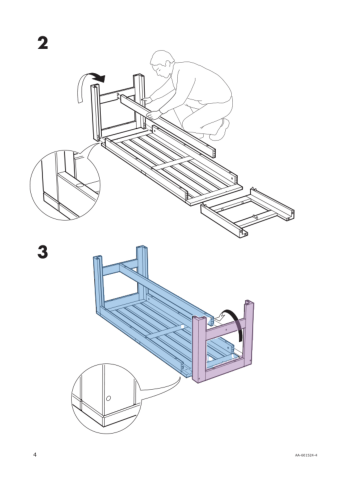

IAW Metadata:
url: https://www.youtube.com/watch?v=KPs0ik2FcsY
title: IKEA assembly instructions, ÄPPLARÖ Bench
duration: 155
height: 1440
width: 2560
fps: 30
annotation: [{'start': 20, 'end': 32, 'action': 0}, {'start': 38.7, 'end': 44.6, 'action': 1}, {'start': 47, 'end': 62.1, 'action': 2}, {'start': 68.5, 'end': 93.8, 'action': 3}, {'start': 106.4, 'end': 116.8, 'action': 4}, {'start': 122.3, 'end': 127.3, 'action': 5}]
people_count: 1
person_view: firstPerson
is_fixed: fixed
is_indoor: indoor
../data/parts/Bench/applaro/00.obj
../data/parts/Bench/applaro/02.obj
mesh:  0,2
extrinsic:  [[0.6948878546400095, -0.20757959684790792, -0.6885067758898714, -0.4719483372956548], [-0.24659472578510883, 0.8305971433066626, -0.49929893525399976, 0.48288741208509645], [0.6755160328880233, 0.516738905544445, 0.5259838332191931, 1.2925383832393793], [0.0, 0.0, 0.0, 1.0]]
mesh:  1
extrinsic:  [[0.7234766200691943, -0.045447072827285204, -0.6888513219735347, -0.442986850470934], [-0.427433549053900

In [4]:
video_idx = 0  # Index of the video
frame_idx = 12  # Index of the frame within the video

sample = dataset.__getitem__(video_idx, frame_idx)


# Visualizing Object Meshes
To visualize the object meshes in the frame, we can use the `trimesh` library. We extract the meshes from the sample and create a `trimesh.Scene` object. Then, we add each mesh to the scene and display it.

In [6]:
import trimesh
import numpy as np
mesh_all = sample[0]['meshes'].copy()
scene = trimesh.Scene()
for mesh in mesh_all:
    scene.add_geometry(mesh)
scene.show()

# Exporting Object Poses as .glb
To export the object poses in the frame as a .glb file, we extract the meshes from the sample, create a `trimesh.Scene` object, assign colors to each mesh, make the meshes double-sided, concatenate the meshes into a single mesh, add the concatenated mesh to the scene, and export the scene as a .glb file.

In [7]:

mesh_all = sample[0]['meshes'].copy()
frame_parts = sample[0]['frame_parts']


scene = trimesh.Scene()
colors = [
    '#5A9BD5', '#FF6F61', '#77B77A', '#A67EB1', '#FF89B6', '#FFB07B',
    '#C5A3CF', '#FFA8B6', '#A3C9E0', '#FFC89B', '#E58B8B',
    '#A3B8D3', '#D4C3E8', '#66B2AA', '#E4A878', '#6882A4', '#D1AEDD', '#E8A4A6',
    '#A5DAD7', '#C6424A', '#E1D1F4', '#FFD8DC', '#F4D49B', '#8394A8'
]
meshes = None
print(len(mesh_all))
for m, mesh in enumerate(mesh_all):
    color_index = min([int(p) for p in frame_parts[m].split(',')])
    mesh = mesh.copy()
    
    # Make the mesh double-sided by duplicating faces with reversed normals
    reversed_faces = mesh.faces[:, ::-1]
    combined_faces = np.vstack((mesh.faces, reversed_faces))
    combined_vertices = np.vstack((mesh.vertices, mesh.vertices))
    mesh = trimesh.Trimesh(vertices=combined_vertices, faces=combined_faces)

    # Assign color to mesh
    color_rgba = trimesh.visual.color.hex_to_rgba(colors[color_index % len(colors)])

    mesh.visual.face_colors = np.tile(color_rgba, (mesh.faces.shape[0], 1))
    if meshes is None:
        meshes = mesh.copy()
    else:
        meshes = trimesh.util.concatenate(meshes, mesh.copy())

# Rotate the mesh

scene.add_geometry(meshes)
# Export to glb
# scene.export(f'scene.glb')
scene.show()

3
